In [1]:
import numpy, pandas
from mystats import Summary

In [2]:
spy_weekly = pandas.read_csv('SPY.csv', parse_dates=['Date'])

spy_weekly['log_pct_gain'] = 100 * numpy.log(spy_weekly['Adj Close']).diff()

spy_weekly = (spy_weekly.groupby(pandas.Grouper(freq='W', key='Date'))
    .agg({'Date': numpy.max, 'log_pct_gain': numpy.sum}))

spy_weekly['cal_days'] = spy_weekly['Date'].diff()

spy_weekly = spy_weekly.iloc[1:]

spy_weekly['cal_days'] = spy_weekly.cal_days.dt.days

In [3]:
spy_summary = Summary(spy_weekly.log_pct_gain, spy_weekly.cal_days)

In [4]:
from scipy.stats import norm, norminvgauss
from scipy.optimize import minimize

sorted_gains = spy_weekly.log_pct_gain.sort_values()

def evaluate(params):
    alpha, beta, loc, scale = params
    return -norminvgauss.logpdf(sorted_gains, alpha, beta, loc, scale).sum()

optimization = minimize(evaluate, [0.8,-0.1,0.5,1.9], bounds=[(0,None),(-2,2),(None,None),(None,None)])

print(optimization)

alpha, beta, loc, scale = optimization.x

      fun: 3026.5637087483465
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.73070497e-04, -2.18278728e-03, -9.09494702e-05,  9.54969437e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 70
      nit: 11
   status: 0
  success: True
        x: array([ 0.76369507, -0.14146602,  0.54186506,  1.93890972])


<Figure size 432x288 with 0 Axes>

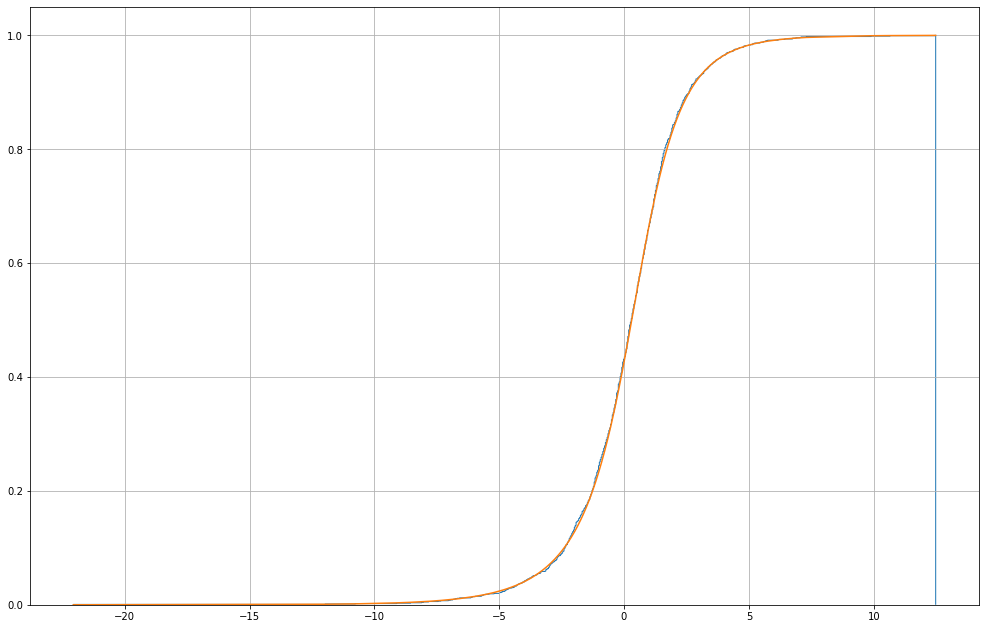

In [7]:
def nig_cdf(x):
    return norminvgauss.cdf(x, alpha, beta, loc, scale)

from matplotlib import pyplot
pyplot.clf()
pyplot.figure(figsize=(17,11))
spy_summary.plot_empirical_cdf()
pyplot.plot(sorted_gains, nig_cdf(sorted_gains))
#pyplot.plot(sorted_gains, norm.cdf(sorted_gains, sorted_gains.mean(), sorted_gains.std()))
pyplot.show()

In [6]:
import matplotlib
matplotlib.__version__

'3.1.2'